Dataset Download Link: \
https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz 

After the download is completed, you should unzip it and copy batches in a folder named "cifar-10-python".

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
batch_1 = unpickle('cifar-10-python/data_batch_1')
batch_2 = unpickle('cifar-10-python/data_batch_2')
batch_3 = unpickle('cifar-10-python/data_batch_3')
batch_4 = unpickle('cifar-10-python/data_batch_4')
batch_5 = unpickle('cifar-10-python/data_batch_5')

test_batch = unpickle('cifar-10-python/test_batch')

In [34]:
batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [4]:
data = list(batch_1[b'data']) + list(batch_2[b'data']) + list(batch_3[b'data']) + list(batch_4[b'data']) + list(batch_5[b'data'])
labels = list(batch_1[b'labels']) + list(batch_2[b'labels']) + list(batch_3[b'labels']) + list(batch_4[b'labels']) + list(batch_5[b'labels'])

In [5]:
np.array(data).shape, np.array(labels).shape

((50000, 3072), (50000,))

In [6]:
X_train = np.array(data)[:1000]
y_train = np.array(labels)[:1000]

X_test = test_batch[b'data'][:100]
y_test = np.array(test_batch[b'labels'])[:100]

In [7]:
X_train.shape, X_test.shape

((1000, 3072), (100, 3072))

In [8]:
X_train = X_train.reshape((1000, 32, 32, 3))
X_test = X_test.reshape((100, 32, 32, 3))

In [9]:
X_train.shape, X_test.shape

((1000, 32, 32, 3), (100, 32, 32, 3))

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Input

In [35]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=8, kernel_size=(3,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(16, kernel_size=(3,3)))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(32))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                18464     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [28]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
29/32 [==========================>...] - ETA: 0s - loss: 2.3210 - accuracy: 0.1298WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fc6a07d71e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

In [29]:
import matplotlib.pyplot as plt

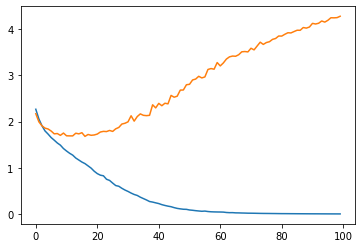

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

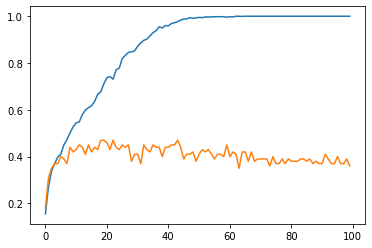

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])